In [43]:

import pandas as pd
import numpy as np
import re
import math

import matplotlib.pyplot as plt



# ROC/AUC curves for Multi omics classification models




In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [44]:
t= pd.read_csv("AD_classification_8_28_2024.csv")
t= pd.read_csv("AD_classification_9_20_2024.csv")

In [45]:
# before balancing the cases and controls (p131036 is AD)
t

,p131036,zSCORE,p130814,p131598,p131582,p130820,p131630,p131560,p130708,p130828,...,Year_of_birth,Townsend_deprivation_index,sex,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,e4_copies,Age_at_recruitment
0,1,1.602121,0,0,0,0,0,0,0,1,...,1939.0,-4.24,0,-11.4008,3.95127,-1.153600,-0.652473,-5.09842,1,68.0
1,1,1.732200,1,1,0,0,0,0,0,0,...,1942.0,-2.88,0,-14.7898,5.87769,-3.426470,0.289210,-6.74912,1,66.0
2,1,0.241131,0,0,0,0,0,0,0,0,...,1944.0,-4.50,1,-13.3587,1.18347,-0.966014,9.160110,16.99400,0,62.0
3,1,3.156675,1,0,0,0,0,0,0,0,...,1946.0,-4.04,0,-14.3961,8.12908,-5.218570,5.621370,8.81825,2,61.0
4,1,1.754691,0,0,0,0,0,0,0,0,...,1940.0,2.63,0,-16.7553,5.53054,-2.015300,5.944990,13.99880,1,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,0,1.710325,0,0,0,0,0,0,0,0,...,1942.0,-2.67,0,-11.0127,3.98721,-0.746561,-0.647348,-7.12291,1,66.0
23282,0,0.944821,0,0,0,0,0,0,0,0,...,1939.0,-2.08,0,-13.9993,2.79810,-2.446400,5.623330,13.28160,1,67.0
23283,0,0.015906,0,0,0,0,0,0,0,0,...,1962.0,-5.52,1,-15.9876,4.76636,-1.039990,5.717790,11.10490,0,46.0
23284,0,-0.627454,0,1,0,0,0,0,0,0,...,1951.0,-2.68,1,-11.8826,3.45795,-3.435470,-0.134893,-11.63410,0,58.0


In [46]:
cases = t[t['p131036'] == 1]
controls = t[t['p131036'] == 0]

In [47]:
cases

,p131036,zSCORE,p130814,p131598,p131582,p130820,p131630,p131560,p130708,p130828,...,Year_of_birth,Townsend_deprivation_index,sex,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,e4_copies,Age_at_recruitment
0,1,1.602121,0,0,0,0,0,0,0,1,...,1939.0,-4.24,0,-11.4008,3.951270,-1.153600,-0.652473,-5.09842,1,68.0
1,1,1.732200,1,1,0,0,0,0,0,0,...,1942.0,-2.88,0,-14.7898,5.877690,-3.426470,0.289210,-6.74912,1,66.0
2,1,0.241131,0,0,0,0,0,0,0,0,...,1944.0,-4.50,1,-13.3587,1.183470,-0.966014,9.160110,16.99400,0,62.0
3,1,3.156675,1,0,0,0,0,0,0,0,...,1946.0,-4.04,0,-14.3961,8.129080,-5.218570,5.621370,8.81825,2,61.0
4,1,1.754691,0,0,0,0,0,0,0,0,...,1940.0,2.63,0,-16.7553,5.530540,-2.015300,5.944990,13.99880,1,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,1,0.184873,1,0,0,0,0,0,0,0,...,1938.0,1.46,1,-15.6282,2.279770,-5.115780,2.114570,-2.10485,1,69.0
474,1,-1.220930,0,0,0,0,0,0,0,0,...,1951.0,-4.19,0,-13.6754,0.452157,-1.325320,-2.673660,-6.26432,0,57.0
475,1,0.700562,0,0,0,0,0,0,0,0,...,1943.0,3.31,0,-12.9179,3.748030,-6.481010,4.732330,9.24089,0,65.0
476,1,2.032565,1,1,0,0,0,0,0,0,...,1938.0,-2.46,1,-15.2501,3.411780,-1.165330,0.496950,-4.57977,1,70.0


In [48]:
cases.shape[0]

478

In [49]:
under_controls = controls.sample( cases.shape[0], random_state=42)


In [50]:
balanced_df = pd.concat([cases, under_controls], axis = 0)


In [51]:
#t2 = t.drop(['eid', 'Year_of_birth' ], axis = 1)
t2 = balanced_df.drop([ 'Year_of_birth' ], axis = 1)

In [52]:
t2.columns

Index(['p131036', 'zSCORE', 'p130814', 'p131598', 'p131582', 'p130820',
       'p131630', 'p131560', 'p130708', 'p130828', 'p130008', 'p130714',
       'p131640', 'p130770', 'p130826', 'p130774', 'p130718', 'p130824',
       'p130706', 'nptxr', 'cst5', 'psg1', 'ren', 'calb1', 'gdf15', 'il1rl1',
       'ltbp2', 'nefl', 'gfap', 'Townsend_deprivation_index', 'sex',
       'p22009_a1', 'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5',
       'e4_copies', 'Age_at_recruitment'],
      dtype='object')

In [53]:
X_combined_model = t2.drop(['p131036'], axis = 1).copy()
y = t2['p131036'].copy()

In [54]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2882     0
9926     0
21190    0
3896     0
14888    0
Name: p131036, Length: 956, dtype: int64

In [55]:
pd.Series(y).value_counts()

1    478
0    478
Name: p131036, dtype: int64

In [56]:
#divide to 5 different data sets

X_genetics_info = t2.drop(['p131036', 'p130814', 'p131598', 'p131582', 'p130820',
                            'p131630', 'p131560', 'p130708', 'p130828', 'p130008', 'p130714',
                            'p131640', 'p130770', 'p130826', 'p130774', 'p130718', 'p130824',
                            'p130706', 'nptxr', 'cst5', 'psg1', 'ren', 'calb1', 'gdf15', 'il1rl1',
                            'ltbp2', 'nefl', 'gfap', 'Townsend_deprivation_index', 'sex','Age_at_recruitment' ], axis = 1).copy()

X_olink_info = t2.drop(['p131036', 'zSCORE', 'p130814', 'p131598', 'p131582', 'p130820',
       'p131630', 'p131560', 'p130708', 'p130828', 'p130008', 'p130714',
       'p131640', 'p130770', 'p130826', 'p130774', 'p130718', 'p130824',
       'p130706', 'Townsend_deprivation_index', 'sex',
       'p22009_a1', 'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5',
       'e4_copies', 'Age_at_recruitment' ], axis = 1).copy()

X_clinical_info = t2.drop(['p131036', 'zSCORE', 'nptxr', 'cst5', 'psg1', 'ren', 'calb1', 'gdf15', 'il1rl1',
       'ltbp2', 'nefl', 'gfap', 'Townsend_deprivation_index', 'sex',
       'p22009_a1', 'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5',
       'e4_copies', 'Age_at_recruitment'], axis = 1).copy()

X_demographics_info = t2.drop(['p131036', 'zSCORE', 'p130814', 'p131598', 'p131582', 'p130820',
       'p131630', 'p131560', 'p130708', 'p130828', 'p130008', 'p130714',
       'p131640', 'p130770', 'p130826', 'p130774', 'p130718', 'p130824',
       'p130706', 'nptxr', 'cst5', 'psg1', 'ren', 'calb1', 'gdf15', 'il1rl1',
       'ltbp2', 'nefl', 'gfap', 'p22009_a1', 'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5',
       'e4_copies' ], axis = 1).copy()


X_combined_without_clinical_info = t2.drop(['p131036', 'p130814', 'p131598', 'p131582', 'p130820',
       'p131630', 'p131560', 'p130708', 'p130828', 'p130008', 'p130714',
       'p131640', 'p130770', 'p130826', 'p130774', 'p130718', 'p130824',
       'p130706'], axis = 1).copy()


In [57]:
X_combined_model

,zSCORE,p130814,p131598,p131582,p130820,p131630,p131560,p130708,p130828,p130008,...,gfap,Townsend_deprivation_index,sex,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,e4_copies,Age_at_recruitment
0,1.602121,0,0,0,0,0,0,0,1,0,...,0.22080,-4.24,0,-11.40080,3.95127,-1.153600,-0.652473,-5.09842,1,68.0
1,1.732200,1,1,0,0,0,0,0,0,0,...,0.02920,-2.88,0,-14.78980,5.87769,-3.426470,0.289210,-6.74912,1,66.0
2,0.241131,0,0,0,0,0,0,0,0,0,...,-0.18500,-4.50,1,-13.35870,1.18347,-0.966014,9.160110,16.99400,0,62.0
3,3.156675,1,0,0,0,0,0,0,0,0,...,0.83545,-4.04,0,-14.39610,8.12908,-5.218570,5.621370,8.81825,2,61.0
4,1.754691,0,0,0,0,0,0,0,0,0,...,0.86480,2.63,0,-16.75530,5.53054,-2.015300,5.944990,13.99880,1,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,0.509410,0,0,0,0,0,0,0,0,0,...,0.20005,2.12,0,-8.40366,2.12923,-0.096244,0.819264,1.51987,0,50.0
9926,2.265299,0,0,0,0,0,0,0,0,0,...,0.03300,-1.61,1,-10.09840,3.84005,-4.658900,2.850080,-2.71943,1,44.0
21190,2.645877,0,0,0,0,1,0,0,0,0,...,0.36435,-2.85,0,-15.49390,5.90878,-2.820120,0.574835,6.72640,2,61.0
3896,1.862562,1,0,0,0,0,0,0,0,0,...,0.67670,-3.38,1,-11.46590,3.37351,-1.914410,-0.385494,-5.04493,1,63.0


In [58]:
X_genetics_info 

,zSCORE,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,e4_copies
0,1.602121,-11.40080,3.95127,-1.153600,-0.652473,-5.09842,1
1,1.732200,-14.78980,5.87769,-3.426470,0.289210,-6.74912,1
2,0.241131,-13.35870,1.18347,-0.966014,9.160110,16.99400,0
3,3.156675,-14.39610,8.12908,-5.218570,5.621370,8.81825,2
4,1.754691,-16.75530,5.53054,-2.015300,5.944990,13.99880,1
...,...,...,...,...,...,...,...
2882,0.509410,-8.40366,2.12923,-0.096244,0.819264,1.51987,0
9926,2.265299,-10.09840,3.84005,-4.658900,2.850080,-2.71943,1
21190,2.645877,-15.49390,5.90878,-2.820120,0.574835,6.72640,2
3896,1.862562,-11.46590,3.37351,-1.914410,-0.385494,-5.04493,1


In [59]:
X_olink_info

,nptxr,cst5,psg1,ren,calb1,gdf15,il1rl1,ltbp2,nefl,gfap
0,-0.12315,-0.16750,1.2970,0.03730,0.04710,0.14335,0.57445,0.2645,0.5520,0.22080
1,-0.32820,-0.14590,0.8841,-0.11510,0.85370,-0.04775,0.53130,0.5502,0.8415,0.02920
2,-0.37020,0.24280,-0.6675,0.61410,-0.35385,0.65665,0.67210,0.4225,-0.0243,-0.18500
3,-0.36270,-0.70755,1.9420,0.17525,-0.04120,0.49385,-0.12020,0.9517,-0.2469,0.83545
4,-0.51800,1.34980,0.5248,-0.56410,0.00055,1.07005,0.07510,0.1966,0.5142,0.86480
...,...,...,...,...,...,...,...,...,...,...
2882,0.19650,0.84995,-0.8705,0.24665,0.68920,-0.41765,-1.34190,-0.3308,0.2739,0.20005
9926,0.17540,-0.67170,-0.2902,0.11960,-0.41790,-0.40735,0.27130,-0.0403,-1.0664,0.03300
21190,0.40360,-0.16480,0.0526,0.96590,0.09500,0.50115,0.70650,0.9304,1.0523,0.36435
3896,0.16260,-0.46420,1.5143,1.36800,0.23870,0.75495,0.58180,0.4686,0.2165,0.67670


In [60]:
X_clinical_info

,p130814,p131598,p131582,p130820,p131630,p131560,p130708,p130828,p130008,p130714,p131640,p130770,p130826,p130774,p130718,p130824,p130706
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9926,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21190,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
X_demographics_info

,Townsend_deprivation_index,sex,Age_at_recruitment
0,-4.24,0,68.0
1,-2.88,0,66.0
2,-4.50,1,62.0
3,-4.04,0,61.0
4,2.63,0,67.0
...,...,...,...
2882,2.12,0,50.0
9926,-1.61,1,44.0
21190,-2.85,0,61.0
3896,-3.38,1,63.0


In [63]:
# !pip install xgboost

In [64]:
import numpy as np
import scipy.stats as stats

# Function to calculate 95% confidence interval
def calculate_95_ci(data):
    # Step 1: Calculate the sample mean and standard error of the mean (SEM)
    mean = np.mean(data)
    sem = stats.sem(data)
    
    # Step 2: Calculate the 95% confidence interval
    confidence_level = 0.95
    degrees_freedom = len(data) - 1
    ci = stats.t.interval(confidence_level, degrees_freedom, mean, sem)
    
    # Format as mean ± CI
    ci_range = mean - ci[0]  # difference between mean and lower bound
    return f"{mean:.2f} ± {ci_range:.2f}"



In [100]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

# Ensure y is a numpy array
y = y.values if isinstance(y, pd.Series) else y

# Data preparation
feature_sets = {
    'Genetics': X_genetics_info,
    'Clinical': X_clinical_info,
    'Olink': X_olink_info,
    'Demographics': X_demographics_info,
    'combined_without_clinical': X_combined_without_clinical_info,
    'Combined': X_combined_model,
}

#Define a parameter grid for Gradient Boosting
param_grid = {
    'xgb__n_estimators': [2, 3, 5, 10, 15],
    'xgb__learning_rate': [0.001, 0.01, 0.1],
    'xgb__max_depth': [3, 4, 5]
}

# Initialize metrics storage
df_metrics = []

# Outer CV loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

full_list_d_modality = {}
# Loop through each feature set
for label, X in feature_sets.items():
    # if not label == 'Combined':
    #    continue
    # Metrics for the current feature set
    feature_metrics = []
    temp_full_list_d_modality = []
    # Outer CV
    for train_index, test_index in outer_cv.split(X, y):
        print (label, X.shape, len(train_index), len(test_index))
        # Split data into training and test sets for the outer CV
        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
        y_train_outer, y_test_outer = y[train_index], y[test_index]

        # Define pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
            ('xgb', XGBClassifier())
        ])

        # Inner CV loop for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc', verbose=1, n_jobs=-1)
        
        grid_search.fit(X_train_outer, y_train_outer)

        # Best model evaluation
        best_model = grid_search.best_estimator_

        # Predict probabilities and classes for both training and test sets
        train_probabilities = best_model.predict_proba(X_train_outer)[:, 1]
        test_probabilities = best_model.predict_proba(X_test_outer)[:, 1]
        y_train_pred = best_model.predict(X_train_outer)
        y_test_pred = best_model.predict(X_test_outer)


        
        temp_full_list_d_modality.append([test_probabilities, y_test_outer])


        # Calculate ROC AUC and Balanced Accuracy for both sets
        train_auc = roc_auc_score(y_train_outer, train_probabilities)
        test_auc = roc_auc_score(y_test_outer, test_probabilities)
        balanced_acc_train = balanced_accuracy_score(y_train_outer, y_train_pred)
        balanced_acc_test = balanced_accuracy_score(y_test_outer, y_test_pred)

        # Calculate confusion matrix and derive sensitivity and specificity
        tn, fp, fn, tp = confusion_matrix(y_test_outer, y_test_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Store metrics
        feature_metrics.append({
            'Train AUC': train_auc,
            'Test AUC': test_auc,
            'Train Balanced Accuracy': balanced_acc_train,
            'Test Balanced Accuracy': balanced_acc_test,
            'Sensitivity': sensitivity,
            'Specificity': specificity
        })
    full_list_d_modality[label] = temp_full_list_d_modality
    # Average metrics for the current feature set
    avg_metrics = {
        'Feature Set': label,
        'Train AUC': np.mean([m['Train AUC'] for m in feature_metrics]),
        'Test AUC': np.mean([m['Test AUC'] for m in feature_metrics]),
        'Train Balanced Accuracy': np.mean([m['Train Balanced Accuracy'] for m in feature_metrics]),
        'Test Balanced Accuracy': np.mean([m['Test Balanced Accuracy'] for m in feature_metrics]),
        'Sensitivity': np.mean([m['Sensitivity'] for m in feature_metrics]),
        'Specificity': np.mean([m['Specificity'] for m in feature_metrics]),
        'Train AUC_CI': calculate_95_ci([m['Train AUC'] for m in feature_metrics]),
        'Test AUC_CI': calculate_95_ci([m['Test AUC'] for m in feature_metrics]),
        'Train Balanced Accuracy_CI': calculate_95_ci([m['Train Balanced Accuracy'] for m in feature_metrics]),
        'Test Balanced Accuracy_CI': calculate_95_ci([m['Test Balanced Accuracy'] for m in feature_metrics]),
        'Sensitivity_CI': calculate_95_ci([m['Sensitivity'] for m in feature_metrics]),
        'Specificity_CI': calculate_95_ci([m['Specificity'] for m in feature_metrics])
    }
    df_metrics.append(avg_metrics)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(df_metrics)
# Save DataFrame to a CSV file
metrics_df.to_csv('AD_metrics.csv', index=False)

metrics_df

Genetics (956, 7) 764 192
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Genetics (956, 7) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Genetics (956, 7) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Genetics (956, 7) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Genetics (956, 7) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Clinical (956, 17) 764 192
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Clinical (956, 17) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Clinical (956, 17) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Clinical (956, 17) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Clinical (956, 17) 765 191
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Olink (956, 10) 764 192
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Olink (956, 10) 765 191
Fitti

,Feature Set,Train AUC,Test AUC,Train Balanced Accuracy,Test Balanced Accuracy,Sensitivity,Specificity,Train AUC_CI,Test AUC_CI,Train Balanced Accuracy_CI,Test Balanced Accuracy_CI,Sensitivity_CI,Specificity_CI
0,Genetics,0.812324,0.742426,0.732748,0.686239,0.633838,0.738640,0.81 ± 0.01,0.74 ± 0.04,0.73 ± 0.02,0.69 ± 0.03,0.63 ± 0.11,0.74 ± 0.09
1,Clinical,0.662256,0.610793,0.638874,0.598246,0.506206,0.690285,0.66 ± 0.02,0.61 ± 0.01,0.64 ± 0.01,0.60 ± 0.02,0.51 ± 0.05,0.69 ± 0.05
2,Olink,0.941702,0.865807,0.870037,0.787686,0.776360,0.799013,0.94 ± 0.01,0.87 ± 0.02,0.87 ± 0.02,0.79 ± 0.03,0.78 ± 0.07,0.80 ± 0.05
3,Demographics,0.854678,0.818877,0.777464,0.749035,0.780373,0.717697,0.85 ± 0.02,0.82 ± 0.05,0.78 ± 0.02,0.75 ± 0.03,0.78 ± 0.06,0.72 ± 0.11
4,combined_without_clinical,0.941705,0.894369,0.867675,0.821173,0.820175,0.822171,0.94 ± 0.00,0.89 ± 0.02,0.87 ± 0.01,0.82 ± 0.04,0.82 ± 0.06,0.82 ± 0.04
5,Combined,0.951200,0.898901,0.879447,0.825373,0.820154,0.830592,0.95 ± 0.02,0.90 ± 0.02,0.88 ± 0.02,0.83 ± 0.03,0.82 ± 0.06,0.83 ± 0.04


In [101]:
len(full_list_d_modality['Combined'])

5

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positi

AUCS 0.7424 [0.701-0.7838] 0.74 [0.7-0.78]
AUCS 0.6108 [0.5982-0.6234] 0.61 [0.6-0.62]
AUCS 0.8658 [0.8457-0.886] 0.87 [0.85-0.88]
AUCS 0.8189 [0.7724-0.8654] 0.82 [0.81-0.83]
AUCS 0.8944 [0.8733-0.9154] 0.89 [0.89-0.9]
AUCS 0.8989 [0.877-0.9208] 0.9 [0.89-0.91]


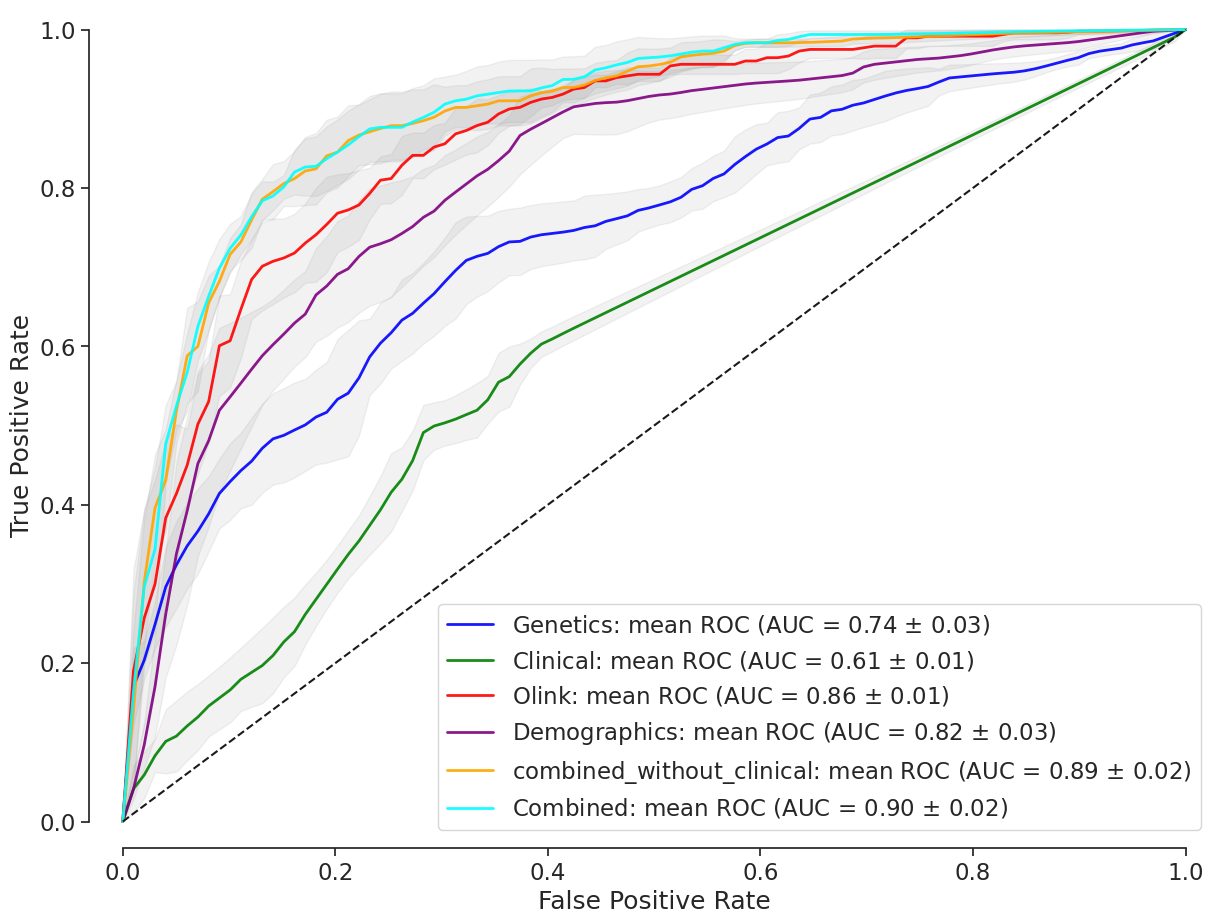

In [109]:
def f_mean(x):
    return str(round(np.mean(list(x)), 4)*100) + '+/-' + str(np.std(list(x)).round(2))

import numpy as np
import scipy.stats as st
from scipy.stats import iqr
import matplotlib as mpl

# 0·95 (0·94–0·95)

def f_std(d):
    a, b = st.t.interval(alpha=0.95, df=len(d)-1, loc=np.mean(d), scale=st.sem(d)) 
    a = np.mean(d) - np.std(d)
    b = np.mean(d) + np.std(d)
    return str(round(np.mean(list(d)), 2)) + f' [{round(a, 2)}-{round(b, 2)}]'

def f_ci(d):
    a, b = st.t.interval(alpha=0.95, df=len(d)-1, loc=np.mean(d), scale=st.sem(d)) 
    return str(round(np.mean(list(d)), 4)) + f' [{round(a, 4)}-{round(b, 4)}]'
    # return str(round(np.mean(list(d)), 2)) + '+/-' + f"{round(b - (a+b)/2, 2)}"
    
def f_iqr(d):
    m = np.mean(list(d))
    a, b = m - iqr(d), m + iqr(d)
    return str(round(np.mean(list(d)), 2)) + f' [{round(a, 2)}-{round(b, 2)}]'
    
import seaborn as sns
from sklearn import metrics
from collections import defaultdict
from sklearn import metrics
from collections import defaultdict
from numpy import interp
from sklearn.metrics import roc_curve, auc, accuracy_score
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import copy
sns.reset_defaults()
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_theme("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("white", )
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

mpl.rc('font', family='serif', serif='Times New Roman')
plt.rcParams.update({"savefig.format": 'png'})

def plot_auc_roc(full_list, n_classes, class_label, ax, show=True, addition='', palette_progression=None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    mean_tpr = dict()
    mean_fpr = dict()
    mean_auc = dict()
    all_means = defaultdict(list)
    for k in range(n_classes[0], n_classes[1]):
        if class_label.get(k, None) is None:
            continue
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        for preds, label in full_list[k]:
            # preds = lr.fit(X_clinical.iloc[train], Y_clinical.iloc[train]).predict_proba(X_clinical.iloc[test])[:,k]
            # label = [1 if int(j) == (k+2) else 0 for j in Y_clinical.iloc[test]] #2,3,4
            fpr, tpr, _ = metrics.roc_curve(label, preds)
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
        print ("AUCS", f_ci(aucs), f_iqr(aucs))
        class_name = class_label[k]# 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'   
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        all_means[class_name].append(mean_auc)
        std_auc = np.std(aucs)
        if show:
            if std_auc > 0:
                ax.plot(mean_fpr, mean_tpr,
                 label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
                 lw=2, alpha=.9, color=palette_progression[class_label[k]])
            else:
                ax.plot(mean_fpr, mean_tpr,
                 label=r'{0} mean ROC (AUC = {1:0.2f})'.format(class_name, mean_auc, std_auc),
                 lw=2, alpha=.9, color=palette_progression[class_label[k]])
        std_tpr = np.std(tprs, axis=0)
        # std_tpr = get_95ci(tprs)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        if show:
            ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1)
    if not show:
        return pd.DataFrame(all_means)
    # ax.figure(1, figsize=(9, 5))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.025, 1.025])
    ax.set_ylim([-0.025, 1.025])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('{}'.format(addition))
    ax.legend()
    # plt.show()
    return pd.DataFrame(all_means)
    
# palette_progression = {'Control':'orange', 'AD': 'blue'}
# class_labels = {0: 'AD', 1: 'Control'}

palette_progression = {'Age+Sex+Townsend:': 'lightcoral', 'Olink:': 'red'}

colorlist = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
class_labels = {}
input_predictions = []
for e, x in enumerate(list(full_list_d_modality)):
    class_labels[e] = x + ':'
    palette_progression[x + ':'] = colorlist[e]
    input_predictions.append(full_list_d_modality[x])
    
# class_labels = {0: 'Age+Sex+Townsend:', 1: 'Olink:'}
fig, ax = plt.subplots(1, 1, figsize=(8*1.8,6*1.8))
e = 0
# ax = axs.reshape(-1)[e]
sns.despine(top=False, right=False, left=False, bottom=False, offset=None, trim=False)
sns.despine(offset=5, trim=True)
# ax.spines['bottom'].set_visible(False)
plot_auc_roc(input_predictions, (0, len(class_labels)), class_labels,  ax, show=True, addition='', palette_progression=palette_progression)
plt.show()
# [full_list_d_modality['Combined'], full_list_d_modality['Olink']]
# palette_progression = {'Age+Sex+Townsend+PD_prs:': 'red'}
# class_labels = {0: 'Age+Sex+Townsend+PD_prs:'}
# plot_auc_roc(full_list_d_modality[1:2], (0, len(class_labels)), class_labels,  ax, show=True, addition='', palette_progression=palette_progression)



In [66]:
X = feature_sets['Combined'] # X_combined_model.shape

In [68]:
# Create Explainer and get shap_values
import shap
from sklearn.metrics import r2_score

from lightgbm import LGBMRegressor
y_regr = best_model.predict_proba(X)[:, 1]
model = LGBMRegressor()
model.fit(X, y_regr)
y_pred = model.predict(X)
explainer = shap.Explainer(model, X)
my_shap_values = explainer(X, check_additivity=False)

In [69]:
print ("R squared_error: ", r2_score(y_regr, y_pred))
print (roc_auc_score(y, y_pred))

R squared_error:  0.9990431492914927
0.9333738905131213


In [120]:
mapping_features = pd.read_csv("AD_definition.csv")
mapping_features_dict = dict(zip(mapping_features['Key'], mapping_features['Definition']))
for i,j in mapping_features_dict.items():
    if pd.isnull(j):
        mapping_features_dict[i] = i


categ_features = {}
for m, o in mapping_features_dict.items():
    if m in X_genetics_info.columns:
        categ_features[m] = 'Genetics/' + o
    elif m in X_olink_info.columns:
        categ_features[m] = 'Olink/' + o
    elif m in X_demographics_info.columns:
        categ_features[m] = "Demographics/" + o
    elif m in X_clinical_info.columns:
        categ_features[m] = "Clinical/" + o
    else:
        categ_features[m] = "Other/"+ o

In [126]:
import gzip
from pathlib import Path
import joblib
fpth = Path("/home/anant/Documents/MohammadProject/classification/Gut-Brain-Nexus")
joblib.dump(model, fpth / 'ad_reduced_lgb_ms.pkl')

f = gzip.GzipFile(fpth / 'ad_shap_object_values_ms.npy.gz', "w")
np.save(f, my_shap_values.values, allow_pickle=False)

f = gzip.GzipFile(fpth / 'ad_shap_object_base_values_ms.npy.gz', "w")
np.save(f, my_shap_values.base_values, allow_pickle=False)

f = gzip.GzipFile(fpth / 'ad_shap_object_data_ms.npy.gz', "w")
np.save(f, my_shap_values.data, allow_pickle=False)

feature_names = np.array(X.columns.map(lambda x: categ_features.get(x, x)), dtype='<U53')
f = gzip.GzipFile(fpth / 'ad_shap_object_feature_names_ms.npy.gz', "w")
np.save(f, feature_names, allow_pickle=False)

with open(fpth  /"ad_top20_feature_list_ms.txt", 'w') as f:
  f.write("\n".join(list(X.columns.map(lambda x: categ_features.get(x, x)))))

X.sample(10).rename(columns=categ_features).to_csv(fpth / "sample_dataset_ADRD_MS.csv", index=False)

In [83]:
feature_names

array(['zSCORE', 'Disorders Of Lipoprotein Metabolism And Other Lipidae',
       'Gastritis And Duodenitis', 'Oesophagitis',
       'Disorders Of Mineral Metabolism',
       'Other Non-Infective Gastro-Enteritis And Colitis',
       'Diseases Of Pulp And Periapical Tissues',
       'Non-Insulin-Dependent Diabetes Mellitus',
       'Other Disorders Of Fluid, Electrolyte And Acid-Base B',
       'Other Bacterial Intestinal Infections',
       'Unspecified Diabetes Mellitus',
       'Other Functional Intestinal Disorders',
       'Deficiency Of Other B Group Vitamins', 'Volume Depletion',
       'Vitamin D Deficiency',
       'Other Disorders Of Pancreatic Internal Secretion', 'Amyloidosis',
       'Insulin-Dependent Diabetes Mellitus',
       'Neuronal pentraxin receptor', 'Cystatin-D',
       'Pregnancy-specific beta-1-glycoprotein 1', 'Renin', 'Calbindin',
       'Growth/differentiation factor 15',
       'Interleukin-1 receptor-like 1',
       'Latent-transforming growth factor beta-b

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 

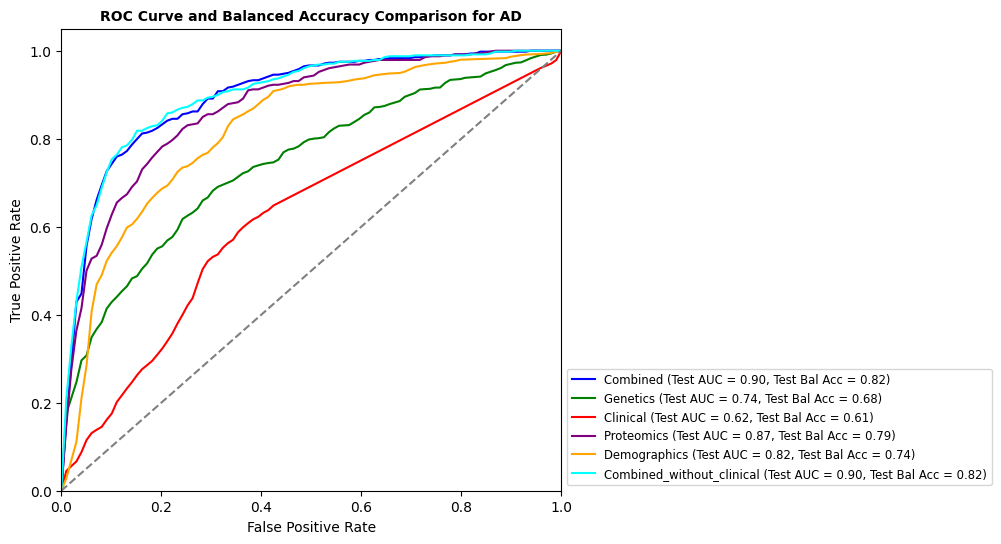

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd

# Data preparation
feature_sets = {
    'Combined': X_combined_model,
    'Genetics': X_genetics_info,
    'Clinical': X_clinical_info,
    'Proteomics': X_olink_info,
    'Demographics': X_demographics_info,
    'Combined_without_clinical': X_combined_without_clinical_info
}

# Define a parameter grid for Gradient Boosting
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5]
}

# Initialize metrics storage
metrics = []

# Outer CV loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a list of colors
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Initialize plot for ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each feature set
for idx, (label, X) in enumerate(feature_sets.items()):
    # Metrics for the current feature set
    feature_metrics = []

    # Outer CV
    for train_index, test_index in outer_cv.split(X, y):
        # Split data into training and test sets for the outer CV
        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
        y_train_outer, y_test_outer = y[train_index], y[test_index]

        # Define pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', XGBClassifier())
        ])

        # Inner CV loop for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc', verbose=1, n_jobs=-1)
        grid_search.fit(X_train_outer, y_train_outer)

        # Best model evaluation
        best_model = grid_search.best_estimator_

        # Predict probabilities for test set
        test_probabilities = best_model.predict_proba(X_test_outer)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_outer, test_probabilities)
        auc = roc_auc_score(y_test_outer, test_probabilities)
        balanced_acc = balanced_accuracy_score(y_test_outer, best_model.predict(X_test_outer))

        # Store metrics
        feature_metrics.append({
            'FPR': fpr,
            'TPR': tpr,
            'AUC': auc,
            'Balanced Accuracy': balanced_acc
        })

    # Average metrics for the current feature set
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    mean_auc = 0
    mean_balanced_acc = 0
    n_splits = len(feature_metrics)

    for metrics in feature_metrics:
        fpr = metrics['FPR']
        tpr = metrics['TPR']
        auc = metrics['AUC']
        balanced_acc = metrics['Balanced Accuracy']

        # Interpolate the TPR values to match the common FPR values
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_auc += auc / n_splits
        mean_balanced_acc += balanced_acc / n_splits

    mean_tpr /= n_splits
    mean_tpr[0] = 0  # Ensure the curve starts at (0,0)

    # Plot ROC curve with custom color
    color = color_list[idx % len(color_list)]  # Cycle through colors if more feature sets than colors
    ax.plot(mean_fpr, mean_tpr, color=color, 
            label=f'{label} (Test AUC = {mean_auc:.2f}, Test Bal Acc = {mean_balanced_acc:.2f})')

# Plot settings
ax.plot([0, 1], [0, 1], '--', color='grey')  # Diagonal line for random classifier
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Customize title and labels with default font
title_font = {'fontsize': 10, 'fontweight': 'bold'}
label_font = {'fontsize': 10}

ax.set_xlabel('False Positive Rate', **label_font)
ax.set_ylabel('True Positive Rate', **label_font)
ax.set_title('ROC Curve and Balanced Accuracy Comparison for AD', **title_font)

# Set the legend with smaller font size and marker scale
ax.legend(loc='lower left', bbox_to_anchor=(1, 0), bbox_transform=ax.transAxes, fontsize='small', markerscale=0.75)

# Adjust layout to make room for the legend
plt.subplots_adjust(right=0.75)

# Save the plot to a file
plt.savefig('model_comparison_plot.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
